# Python Notebook to Reduce the Balanced Dataset

### 1. Imports

In [14]:
import pandas as pd
import re
import string

### 2. Read Dataset and Remove Duplicates

In [11]:
# Read the dataset
df = pd.read_csv('HateSpeechDatasetBalanced.csv')

# Remove duplicate 'Content' rows
df = df.drop_duplicates(subset='Content')

### 3. Seperate data and Sample Rows

In [12]:
# Separate the data into Label 0 and Label 1
df_label_0 = df[df['Label'] == 0]
df_label_1 = df[df['Label'] == 1]

# Sample 50,000 rows from each label
df_label_0_sampled = df_label_0.sample(n=50000, random_state=42)
df_label_1_sampled = df_label_1.sample(n=50000, random_state=42)

### 4. Prepare for Export

In [27]:
# Combine the two samples
df_balanced = pd.concat([df_label_0_sampled, df_label_1_sampled])

# Optionally shuffle the combined dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Lowercase
    text = text.lower()
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_balanced['clean_text'] = df_balanced['Content'].apply(preprocess_text)

In [28]:
df_balanced.head

<bound method NDFrame.head of                                                  Content  Label  \
0      he don't want my surrender to my new math book...      1   
1      pravi drzavnicki gov or sto god missile oh emu...      1   
2           i fucking hate going to my girlfriends house      0   
3      asked that pretend son to b a time the son wou...      1   
4      well myself am connected to an ethnically jewi...      1   
...                                                  ...    ...   
99995  seriously russia this what a slut your strateg...      0   
99996  i am baffled bitches quick to say you fucked t...      1   
99997                   east hanging subject area is gay      1   
99998        any complaints with that as the new wording      0   
99999  every single commie is a resentful son of a bi...      0   

                                              clean_text  
0      he dont want my surrender to my new math book ...  
1      pravi drzavnicki gov or sto god missile 

In [31]:
df_balanced.drop('Content',axis=1)

,Label,clean_text
0,1,he dont want my surrender to my new math book ...
1,1,pravi drzavnicki gov or sto god missile oh emu...
2,0,i fucking hate going to my girlfriends house
3,1,asked that pretend son to b a time the son wou...
4,1,well myself am connected to an ethnically jewi...
...,...,...
99995,0,seriously russia this what a slut your strateg...
99996,1,i am baffled bitches quick to say you fucked t...
99997,1,east hanging subject area is gay
99998,0,any complaints with that as the new wording


### 5. Export

In [32]:
# Save the resulting dataset to a new CSV file
df_balanced.to_csv('HateSpeechDatasetBalanced_reduced.csv', index=False)

### 6. Testing New File

In [17]:
reduced_df = pd.read_csv("HateSpeechDatasetBalanced_reduced.csv")

reduced_df.head

<bound method NDFrame.head of                                                  Content  Label  \
0      he don't want my surrender to my new math book...      1   
1      pravi drzavnicki gov or sto god missile oh emu...      1   
2           i fucking hate going to my girlfriends house      0   
3      asked that pretend son to b a time the son wou...      1   
4      well myself am connected to an ethnically jewi...      1   
...                                                  ...    ...   
99995  seriously russia this what a slut your strateg...      0   
99996  i am baffled bitches quick to say you fucked t...      1   
99997                   east hanging subject area is gay      1   
99998        any complaints with that as the new wording      0   
99999  every single commie is a resentful son of a bi...      0   

                                              clean_text  
0      he dont want my surrender to my new math book ...  
1      pravi drzavnicki gov or sto god missile 

In [18]:
reduced_df.shape

(100000, 3)

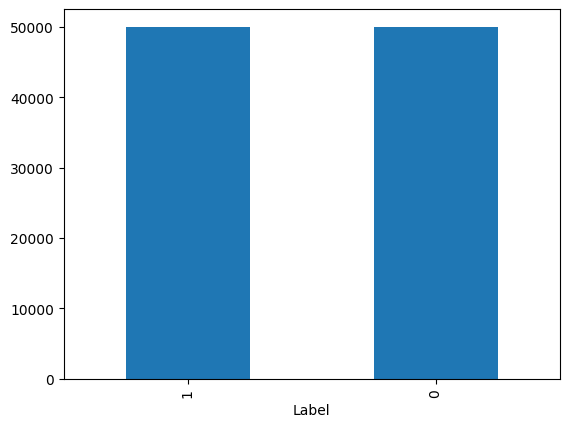

In [8]:
import matplotlib.pyplot as plt

df_balanced['Label'].value_counts().plot(kind='bar')
plt.show()

In [9]:
duplicate_count = df_balanced.duplicated(subset='Content').sum()
print(f"Number of duplicate 'Content' entries: {duplicate_count}")

Number of duplicate 'Content' entries: 0
